In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import cosine_similarity

from typing import List

import warnings
warnings.filterwarnings('ignore')

D:\WPy64-3810\python-3.8.1.amd64\lib\site-packages\pandas\core\arrays\masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.3.1' currently installed).
  from pandas.core import (


In [2]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,9

# Преподготовка данных

## Преподготовка двух датасетов

In [3]:
df_part = pd.read_csv("Rec_data/hashed_participant.csv", index_col=False, sep=";").drop(['Unnamed: 0'], axis=1)

In [4]:
df_part.shape

(32262446, 4)

In [5]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262446 entries, 0 to 32262445
Data columns (total 4 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   pn_lot               object
 1   participant_inn_kpp  object
 2   is_winner            int64 
 3   fz                   object
dtypes: int64(1), object(3)
memory usage: 984.6+ MB


In [6]:
df = pd.read_csv("cut_data_model.csv", index_col=False, sep=";")

Сделаем inner join между таблицами, чтобы соединить услугу и ИНН

In [7]:
data = pd.merge(df,
                df_part,
                on = 'pn_lot')

## Преподготовка соединённого датасета

In [8]:
data.head()

,fz_x,pn_lot,region_code,etp,min_publish_date,purchase_name,lot_name,forsmallbiz,lot_price,procedure_price,customer_inn_kpp,okpd2_code,additional_code,item_descriptions,participant_inn_kpp,is_winner,fz_y
0,44fz,2781020415721000008,78,44fz_contract_single_supplier,2021-11-17,Услуги режиссера-постановщика спектакля Первая...,Услуги режиссера-постановщика спектакля Первая...,False,119474.0,119474.0,7810204157_781001001,90.0,NaN,Услуги режиссера-постановщика спектакля Первая...,eeadcbb3fed4c70130cf5208c9e732b1ccc8434213dd59...,1,44fz
1,44fz,2690106911120000157,69,44fz_contract_single_supplier,2020-12-09,Поставка средств автотранспортных (автомобилей...,Поставка средств автотранспортных (автомобилей...,False,34466250.0,34466250.0,6901069111_695001001,NaN,29.1,"Пожарная автоцистерна АЦ 8,0-40 (4320), модифи...",c13bb2935469f46b87628e0edbe2910dbdcfa3f6360141...,1,44fz
2,44fz,1772404418920000131,77,44fz_contract_single_supplier,2020-08-17,Поставка комплектов эндопротезов,Поставка комплектов эндопротезов,False,16446741.0,16446741.0,7724044189_772401001,32.5,NaN,1.Вкладыш подвижный модульный. Поверхность пол...,4e1518218f321bd16c2df4ebf993e95124f5d0006d208c...,1,44fz
3,44fz,2771890120521000052,77,44fz_contract_single_supplier,2021-11-25,Поставка комплектов учебной литературы для нуж...,Поставка комплектов учебной литературы для нуж...,False,2691263.5,2691263.5,7718901205_771801001,NaN,58.1,Учебники печатные общеобразовательного назначения,e778ec91435f742f7a5ae85141e9a59a18cf39f69f7e94...,1,44fz
4,44fz,2121000104121000333,12,44fz_contract_single_supplier,2021-12-03,Поставка лекарственного препарата для медицинс...,Поставка лекарственного препарата для медицинс...,False,23.0,23.0,1210001041_121001001,drug,NaN,"Цефекон Д, суппозитории ректальные [для детей]...",2cfdecef65c4c38948747ec03fdc404f28119dc5dd9a7d...,1,44fz


In [9]:
data = data.drop(['fz_x'], axis = 1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056274 entries, 0 to 3056273
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   pn_lot               object 
 1   region_code          int64  
 2   etp                  object 
 3   min_publish_date     object 
 4   purchase_name        object 
 5   lot_name             object 
 6   forsmallbiz          bool   
 7   lot_price            float64
 8   procedure_price      float64
 9   customer_inn_kpp     object 
 10  okpd2_code           object 
 11  additional_code      object 
 12  item_descriptions    object 
 13  participant_inn_kpp  object 
 14  is_winner            int64  
 15  fz_y                 object 
dtypes: bool(1), float64(2), int64(2), object(11)
memory usage: 376.0+ MB


In [11]:
data.describe()

,region_code,lot_price,procedure_price,is_winner
count,3.056274e+06,3.056274e+06,3.056274e+06,3.056274e+06
mean,4.996050e+01,3.892321e+06,4.633619e+06,6.590721e-01
std,2.406579e+01,1.492353e+08,1.914951e+08,4.740212e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+01,7.980882e+04,7.990000e+04,0.000000e+00
50%,5.200000e+01,2.895344e+05,2.902383e+05,1.000000e+00
75%,7.300000e+01,1.019306e+06,1.027537e+06,1.000000e+00
max,9.900000e+01,1.275770e+11,1.275770e+11,1.000000e+00


In [12]:
data.isna().sum()/data.shape[0]

pn_lot                 0.000000
region_code            0.000000
etp                    0.037896
min_publish_date       0.000000
purchase_name          0.061122
lot_name               0.580554
forsmallbiz            0.000000
lot_price              0.000000
procedure_price        0.000000
customer_inn_kpp       0.000000
okpd2_code             0.174487
additional_code        0.734187
item_descriptions      0.069661
participant_inn_kpp    0.000000
is_winner              0.000000
fz_y                   0.000000
dtype: float64

In [13]:
target_col = 'is_winner'
cat_cols = data.loc[:, np.object == data.dtypes].columns
num_cols = data.loc[:, np.object != data.dtypes].columns
num_cols, cat_cols

(Index(['region_code', 'forsmallbiz', 'lot_price', 'procedure_price',
        'is_winner'],
       dtype='object'),
 Index(['pn_lot', 'etp', 'min_publish_date', 'purchase_name', 'lot_name',
        'customer_inn_kpp', 'okpd2_code', 'additional_code',
        'item_descriptions', 'participant_inn_kpp', 'fz_y'],
       dtype='object'))

In [14]:
data['etp'].unique()

array(['44fz_contract_single_supplier', 'sberbank-ast.ru', 'gpb.ru',
       'tektorg.ru', 'roseltorg.ru', nan, 'rts-tender.ru', 'zakazrf.ru',
       'fabrikant.ru', 'other_etp', 'b2b-center.ru', 'etprf.ru', 'otc.ru',
       'torgi223.ru', 'lot-online.ru', 'etpzakaz.ru', 'estp.ru',
       'gazprom.ru', 'gazneftetorg.ru', 'astgoz.ru', 'rzd.ru',
       'rosseti.ru'], dtype=object)

In [15]:
col_to_cat = ['region_code', 'additional_code']
for col in col_to_cat:
    data[col] = data[col].astype('object')

У части строк с непустыми добавочными кодами пропущены okpd2, а в другой части они совпадают, так как они передают общую суть, то в данном случае все `additional_code` можно вставить в `okpd2_code`  

In [16]:
data.loc[~data['additional_code'].isna(), ['okpd2_code']] = data.loc[~data['additional_code'].isna()]['additional_code']

In [17]:
data['okpd2_code'] = data['okpd2_code'].astype('string')

In [18]:
data = data.drop(['additional_code'], axis = 1)

In [19]:
target_col = 'is_winner'
cat_cols = data.loc[:, np.object == data.dtypes].columns
num_cols = data.loc[:, np.object != data.dtypes].columns
num_cols, cat_cols

(Index(['forsmallbiz', 'lot_price', 'procedure_price', 'okpd2_code',
        'is_winner'],
       dtype='object'),
 Index(['pn_lot', 'region_code', 'etp', 'min_publish_date', 'purchase_name',
        'lot_name', 'customer_inn_kpp', 'item_descriptions',
        'participant_inn_kpp', 'fz_y'],
       dtype='object'))

Уберём оставшиеся пропуски самыми популярными значениями

In [20]:
data['etp'] = data['etp'].fillna("None")

Убрали все пропуски, оставили только пропуски для эмбеддингов

In [21]:
data.isna().sum()/data.shape[0]

pn_lot                 0.000000
region_code            0.000000
etp                    0.000000
min_publish_date       0.000000
purchase_name          0.061122
lot_name               0.580554
forsmallbiz            0.000000
lot_price              0.000000
procedure_price        0.000000
customer_inn_kpp       0.000000
okpd2_code             0.000000
item_descriptions      0.069661
participant_inn_kpp    0.000000
is_winner              0.000000
fz_y                   0.000000
dtype: float64

In [22]:
cols2embedding = ['purchase_name', 'lot_name', 'item_descriptions']
target_col = 'is_winner'
cat_cols = ['region_code', 'etp']
num_cols = data.loc[:, np.object != data.dtypes].columns
cat_cols, num_cols

(['region_code', 'etp'],
 Index(['forsmallbiz', 'lot_price', 'procedure_price', 'okpd2_code',
        'is_winner'],
       dtype='object'))

Необходим баланс классов

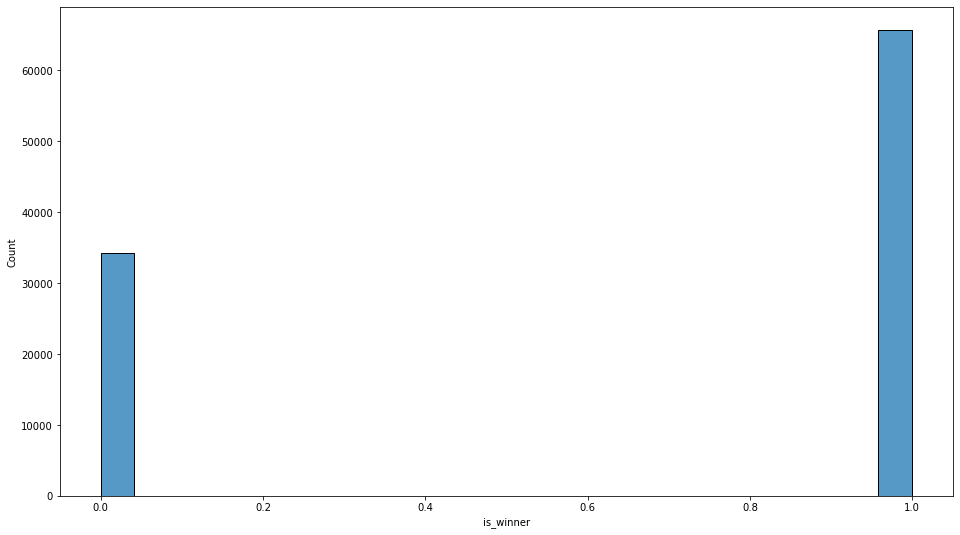

In [23]:
sns.histplot(data=data.sample(n=100000), x="is_winner")
plt.show()

In [24]:
data = pd.concat([data[data['is_winner'] == 1].sample(n=sum(data['is_winner'] == 0)), data[data['is_winner'] == 0]])
sum(data['is_winner'] == 1) == sum(data['is_winner'] == 0)

True

In [25]:
data = data.sort_values(by=['min_publish_date'])

In [26]:
data['min_publish_date'] = data['min_publish_date'].astype("datetime64")

Выделим день, месяц и год

In [27]:
data['year'] = data['min_publish_date'].dt.year
data['month'] = data['min_publish_date'].dt.month
data['day'] = data['min_publish_date'].dt.day

In [28]:
data = data.drop(['min_publish_date'], axis=1)

In [29]:
data = data.drop(['customer_inn_kpp'], axis=1)

In [30]:
sum(data['lot_price'] == data['procedure_price'])/data.shape[0]

0.9960349108274814

In [31]:
sum(data['lot_price'] > data['procedure_price'])/data.shape[0]

0.0

In [32]:
sum(data['lot_price'] < data['procedure_price'])/data.shape[0]

0.003965089172518569

In [33]:
data['procedure_price'] = data['procedure_price'] - data['lot_price']

In [34]:
data = data.rename(columns={"fz_y": "fz"})

In [35]:
data.to_csv('prepare_data.csv', sep=';', index=False)

In [39]:
data = pd.read_csv('prepare_data.csv', sep=';')

In [40]:
data

,pn_lot,region_code,etp,purchase_name,lot_name,forsmallbiz,lot_price,procedure_price,okpd2_code,item_descriptions,participant_inn_kpp,is_winner,fz,year,month,day
0,0358300383019000001_,61,None,"Услуги водоснабжения, водоотведения",NaN,False,183500.00,0.0,36.0,"Услуги по торговле водой, поставляемой по труб...",249099b43f22089c6b558e20c4132aa18ef2b23d9d9875...,1,44fz,2019,1,5
1,3523500497219000001,52,44fz_contract_single_supplier,NaN,NaN,False,203217.34,0.0,46.1,В соответствии с документацией,e314d2f5008508d85e9d6f159345f84b5a9067c084bcee...,1,44fz,2019,1,6
2,0322300102219000003_,27,None,Услуги по поставке холодного водоснабжения,NaN,False,65000.00,0.0,36.0,Услуги по поставке холодного водоснабжения,42f37f6f1aceec2790f1a3c05e29838c15c219658da3fa...,1,44fz,2019,1,6
3,0337300093319000002_,40,None,"Энергия тепловая, отпущенная котельными",NaN,False,1476269.61,0.0,35.3,"Энергия тепловая, отпущенная котельными",38c0a81b3d051cab277d12c8310b3f52dc65bc9cecb85d...,1,44fz,2019,1,6
4,0318300183819000001_,23,None,поставка природного газа,NaN,False,274754.01,0.0,35.2,"Услуги по продаже потребителям газа, подаваемо...",9ae86184cf4616716999e578788e3f35a04b4994c5571e...,1,44fz,2019,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083933,1990100758322000012,99,44fz_contract_single_supplier,Поставка продуктов питания,Поставка продуктов питания,True,23338.05,0.0,10.5,Сыры полутвердые,72fb64152e0f90463f60f1eec671631daf27e09ff78fb2...,1,44fz,2022,7,1
2083934,2370269625721000072,37,44fz_contract_single_supplier,Оказание услуг по предоставлению постоянного д...,Оказание услуг по предоставлению постоянного д...,True,698568.00,0.0,61.1,Предоставление в пользование симметричного циф...,7364242788bb3a76b5f7272e25ae528b012bee4a5c3b3b...,1,44fz,2022,7,1
2083935,2110148713522000261,11,44fz_contract_single_supplier,Поставка продуктов питания в 3 квартале 2022 г...,Поставка продуктов питания в 3 квартале 2022 г...,True,340074.00,0.0,10.8,Зелень сушеная,c50718b71fbc99d89d66d13c85c49abe4f45c02f5581fb...,1,44fz,2022,7,1
2083936,3740600210722000011,74,44fz_contract_single_supplier,Выполнение работ по капитальному ремонту спор...,Выполнение работ по капитальному ремонту спор...,True,5957745.48,0.0,43.3,выполнение работ по капитальному ремонту спорт...,4d1fcaccab7120a28ee194a188911c4614dbdf89120e27...,1,44fz,2022,7,1


Сформируем окончательный датасет

In [41]:
data_index = data.set_index(['participant_inn_kpp', 'pn_lot'])

# EDA

In [42]:
data_index.head()

,,region_code,etp,purchase_name,lot_name,forsmallbiz,lot_price,procedure_price,okpd2_code,item_descriptions,is_winner,fz,year,month,day
participant_inn_kpp,pn_lot,,,,,,,,,,,,,,
249099b43f22089c6b558e20c4132aa18ef2b23d9d9875e6ab86e756eb59ff22,0358300383019000001_,61,None,"Услуги водоснабжения, водоотведения",NaN,False,183500.00,0.0,36.0,"Услуги по торговле водой, поставляемой по труб...",1,44fz,2019,1,5
e314d2f5008508d85e9d6f159345f84b5a9067c084bceec6bcd0454e74a76573,3523500497219000001,52,44fz_contract_single_supplier,NaN,NaN,False,203217.34,0.0,46.1,В соответствии с документацией,1,44fz,2019,1,6
42f37f6f1aceec2790f1a3c05e29838c15c219658da3faf5fb19f6f6a0c89104,0322300102219000003_,27,None,Услуги по поставке холодного водоснабжения,NaN,False,65000.00,0.0,36.0,Услуги по поставке холодного водоснабжения,1,44fz,2019,1,6
38c0a81b3d051cab277d12c8310b3f52dc65bc9cecb85d2bb0dd306c71d1b030,0337300093319000002_,40,None,"Энергия тепловая, отпущенная котельными",NaN,False,1476269.61,0.0,35.3,"Энергия тепловая, отпущенная котельными",1,44fz,2019,1,6
9ae86184cf4616716999e578788e3f35a04b4994c5571e9599aaff46c9e7b3bc,0318300183819000001_,23,None,поставка природного газа,NaN,False,274754.01,0.0,35.2,"Услуги по продаже потребителям газа, подаваемо...",1,44fz,2019,1,6


In [170]:
data.groupby('pn_lot').agg({"participant_inn_kpp":"count"}).reset_index().sort_values('participant_inn_kpp', ascending=False)

,pn_lot,participant_inn_kpp
128187,017320000182000006_1,289
128184,017320000181900072_1,249
1222481,COM02122000070_1,115
1222491,COM02122000135_1,109
405136,0373200041520000002_,103
...,...,...
589379,1730201464421000004,1
589380,1730201464421000012,1
589381,1730201465119000011,1
589382,1730201465119000019,1


In [171]:
data[data['is_winner'] == 1].groupby('pn_lot').agg({"participant_inn_kpp":"count"}).reset_index().sort_values('participant_inn_kpp', ascending=False)

,pn_lot,participant_inn_kpp
616169,2575201959020000006,51
616171,2575201959021000002,36
851466,32110576075_1,19
851768,32110589492_1,18
842477,32110181948_1,16
...,...,...
345905,1026400520219000016,1
345906,1026400520220000012,1
345907,1026400520221000008,1
345908,1026400520221000012,1


In [337]:
sum(data.groupby('pn_lot').agg({"participant_inn_kpp":"count"})['participant_inn_kpp'])/len(pd.unique(data['pn_lot']))

1.69828886601618

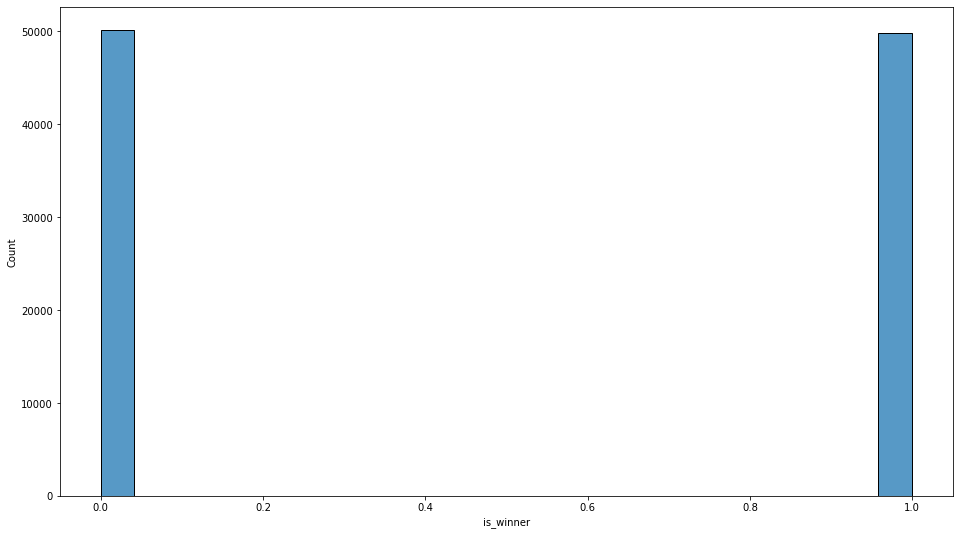

In [123]:
sns.histplot(data=data.sample(n=100000), x="is_winner")
plt.show()

In [81]:
data

,pn_lot,region_code,etp,purchase_name,lot_name,forsmallbiz,lot_price,procedure_price,customer_inn_kpp,okpd2_code,item_descriptions,participant_inn_kpp,is_winner,fz_y,year,month,day
0,0358300383019000002_,61,None,Услуги по распределению электроэнергии,NaN,False,557400.00,557400.00,6166036404_616601001,35.1,Услуги по распределению электроэнергии,5fc832b95256e92ae0d600f17d01c481f4f042b9ac089c...,1,44fz,2019,1,5
1,0358300105819000002_,61,None,Услуги электроэнергии,NaN,False,1044500.00,1044500.00,6166018660_616601001,35.1,Услуги по распределению электроэнергии,5fc832b95256e92ae0d600f17d01c481f4f042b9ac089c...,1,44fz,2019,1,5
2,0337300064319000001_,40,None,"Энергия тепловая, отпущенная котельными Энерг...",NaN,False,1197520.93,1197520.93,4011008714_401101001,35.3,"Энергия тепловая, отпущенная котельными",13f11e252917fe1192e841d121017bb01bf96562121928...,1,44fz,2019,1,5
3,0337300080319000005_,40,None,Услуги по утилизации неопасных отходов прочие,NaN,False,15896.00,15896.00,4011006001_401101001,38.2,Услуги по утилизации неопасных отходов прочие,4252e397f2873e77040e5bacef5bb98865547e8f4c9ff5...,1,44fz,2019,1,5
4,0318300386219000003_,23,None,Услуги фиксированной телефонной связи - предос...,NaN,False,23000.00,23000.00,2301036798_230101001,61.1,Услуги фиксированной телефонной связи - предос...,7365927b63a0fba969ca42388142943f0d4a40dc8440a5...,1,44fz,2019,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056269,1230101386422000059,23,44fz_contract_single_supplier,Поставка ламп бактерицидных,Поставка ламп бактерицидных,False,56122.97,56122.97,2301013864_230101001,27.4,Лампа медицинская бактерицидная ультрафиолетов...,bc804074408b873a9fb0aba93ffc2c523d7a1931e8d409...,1,44fz,2022,7,1
3056270,3270480083222000017,27,44fz_contract_single_supplier,Поставка услуг электроэнергии на третий кварта...,Поставка услуг электроэнергии на третий кварта...,False,450000.00,450000.00,2704800832_270401001,35.1,Услуги по передаче электроэнергии,f393e972b62c8bec56602a5126a37616cf6111eabf49e1...,1,44fz,2022,7,1
3056271,2233201527622000033,23,44fz_contract_single_supplier,Поставка принтеров,Поставка принтеров,True,486295.50,486295.50,2332015276_236401001,26.2,Принтер,e0f7fb17cc63041326baf49be1b93b6d78e998cdc096a3...,1,44fz,2022,7,1
3056272,2110148713522000261,11,44fz_contract_single_supplier,Поставка продуктов питания в 3 квартале 2022 г...,Поставка продуктов питания в 3 квартале 2022 г...,True,340074.00,340074.00,1101487135_110101001,10.8,Зелень сушеная,c50718b71fbc99d89d66d13c85c49abe4f45c02f5581fb...,1,44fz,2022,7,1


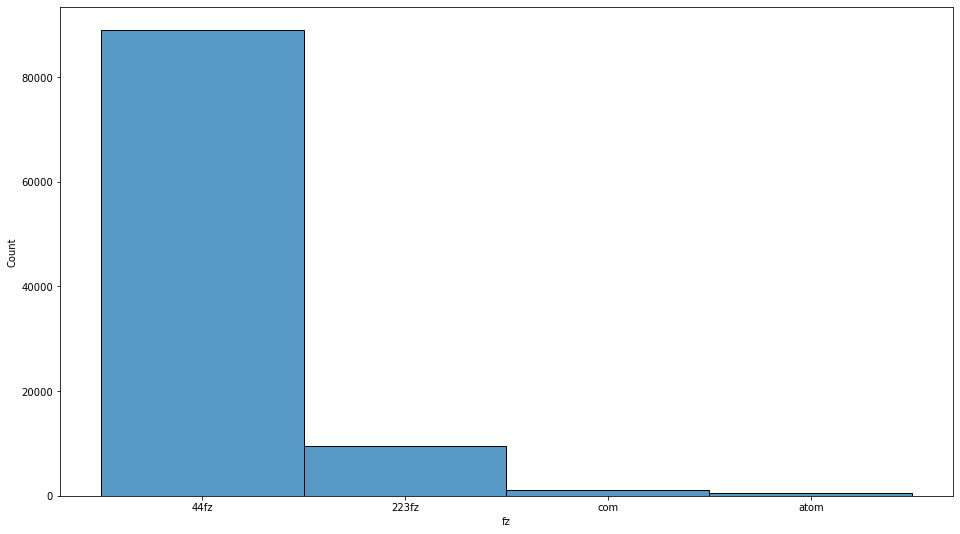

In [124]:
sns.histplot(data=data.sample(n=100000), x="fz")
plt.show()

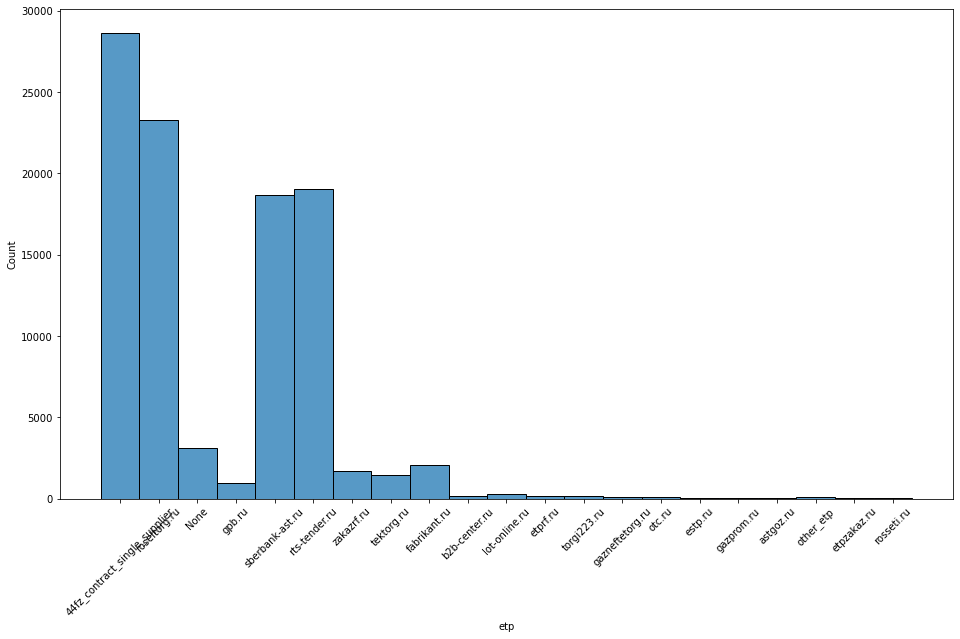

In [125]:
sns.histplot(data=data.sample(n=100000), x="etp")
plt.xticks(rotation=45)
plt.show()

# Обучение модели

In [313]:
!pip install catboost

In [43]:
data_index.head()

,,region_code,etp,purchase_name,lot_name,forsmallbiz,lot_price,procedure_price,okpd2_code,item_descriptions,is_winner,fz,year,month,day
participant_inn_kpp,pn_lot,,,,,,,,,,,,,,
249099b43f22089c6b558e20c4132aa18ef2b23d9d9875e6ab86e756eb59ff22,0358300383019000001_,61,None,"Услуги водоснабжения, водоотведения",NaN,False,183500.00,0.0,36.0,"Услуги по торговле водой, поставляемой по труб...",1,44fz,2019,1,5
e314d2f5008508d85e9d6f159345f84b5a9067c084bceec6bcd0454e74a76573,3523500497219000001,52,44fz_contract_single_supplier,NaN,NaN,False,203217.34,0.0,46.1,В соответствии с документацией,1,44fz,2019,1,6
42f37f6f1aceec2790f1a3c05e29838c15c219658da3faf5fb19f6f6a0c89104,0322300102219000003_,27,None,Услуги по поставке холодного водоснабжения,NaN,False,65000.00,0.0,36.0,Услуги по поставке холодного водоснабжения,1,44fz,2019,1,6
38c0a81b3d051cab277d12c8310b3f52dc65bc9cecb85d2bb0dd306c71d1b030,0337300093319000002_,40,None,"Энергия тепловая, отпущенная котельными",NaN,False,1476269.61,0.0,35.3,"Энергия тепловая, отпущенная котельными",1,44fz,2019,1,6
9ae86184cf4616716999e578788e3f35a04b4994c5571e9599aaff46c9e7b3bc,0318300183819000001_,23,None,поставка природного газа,NaN,False,274754.01,0.0,35.2,"Услуги по продаже потребителям газа, подаваемо...",1,44fz,2019,1,6


In [44]:
X = data_index.drop(['purchase_name', 'lot_name', 'item_descriptions', 'is_winner'], axis=1)
y = data_index['is_winner'].values

Разобъём датасет по дате. Так как датасет отсортирован по дате, то просто возьмём от него доли

In [45]:
share = 0.8
size = data.shape[0]
X_train, X_test = X.iloc[:int(size*share)], X.iloc[-int(size*(1-share)):]
y_train, y_test = y[:int(size*share)], y[-int(size*(1-share)):]

In [46]:
object_cols = ['region_code', 'etp', 'forsmallbiz', 'okpd2_code', 'fz', 'year', 'month', 'day']

In [47]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations = 500,
                             learning_rate = 0.3,
                             depth = 3,
                             cat_features=object_cols)

In [48]:
catboost.fit(X_train, y_train)

0:	learn: 0.4724788	total: 771ms	remaining: 6m 24s
1:	learn: 0.4334294	total: 1.1s	remaining: 4m 33s
2:	learn: 0.4153476	total: 1.61s	remaining: 4m 26s
3:	learn: 0.4057918	total: 2.09s	remaining: 4m 18s
4:	learn: 0.4004973	total: 2.5s	remaining: 4m 7s
5:	learn: 0.3976445	total: 2.82s	remaining: 3m 52s
6:	learn: 0.3956805	total: 3.24s	remaining: 3m 48s
7:	learn: 0.3945147	total: 3.73s	remaining: 3m 49s
8:	learn: 0.3933466	total: 4.06s	remaining: 3m 41s
9:	learn: 0.3924896	total: 4.55s	remaining: 3m 42s
10:	learn: 0.3901266	total: 5.08s	remaining: 3m 45s
11:	learn: 0.3891088	total: 5.55s	remaining: 3m 45s
12:	learn: 0.3884748	total: 6.06s	remaining: 3m 46s
13:	learn: 0.3876287	total: 6.41s	remaining: 3m 42s
14:	learn: 0.3871944	total: 6.81s	remaining: 3m 40s
15:	learn: 0.3869648	total: 7.28s	remaining: 3m 40s
16:	learn: 0.3852580	total: 7.68s	remaining: 3m 38s
17:	learn: 0.3850291	total: 8.08s	remaining: 3m 36s
18:	learn: 0.3843417	total: 8.49s	remaining: 3m 34s
19:	learn: 0.3834388	tota

158:	learn: 0.3694266	total: 1m 6s	remaining: 2m 22s
159:	learn: 0.3693787	total: 1m 7s	remaining: 2m 22s
160:	learn: 0.3693626	total: 1m 7s	remaining: 2m 21s
161:	learn: 0.3693493	total: 1m 7s	remaining: 2m 21s
162:	learn: 0.3693183	total: 1m 8s	remaining: 2m 20s
163:	learn: 0.3692707	total: 1m 8s	remaining: 2m 20s
164:	learn: 0.3692560	total: 1m 8s	remaining: 2m 19s
165:	learn: 0.3692451	total: 1m 9s	remaining: 2m 19s
166:	learn: 0.3692347	total: 1m 9s	remaining: 2m 18s
167:	learn: 0.3692015	total: 1m 10s	remaining: 2m 18s
168:	learn: 0.3691979	total: 1m 10s	remaining: 2m 18s
169:	learn: 0.3691787	total: 1m 11s	remaining: 2m 18s
170:	learn: 0.3691597	total: 1m 11s	remaining: 2m 17s
171:	learn: 0.3691420	total: 1m 11s	remaining: 2m 17s
172:	learn: 0.3691123	total: 1m 12s	remaining: 2m 17s
173:	learn: 0.3690894	total: 1m 13s	remaining: 2m 16s
174:	learn: 0.3690453	total: 1m 13s	remaining: 2m 16s
175:	learn: 0.3690172	total: 1m 13s	remaining: 2m 15s
176:	learn: 0.3690024	total: 1m 14s	r

312:	learn: 0.3667561	total: 2m 9s	remaining: 1m 17s
313:	learn: 0.3667495	total: 2m 10s	remaining: 1m 17s
314:	learn: 0.3667402	total: 2m 10s	remaining: 1m 16s
315:	learn: 0.3667283	total: 2m 10s	remaining: 1m 16s
316:	learn: 0.3667201	total: 2m 11s	remaining: 1m 15s
317:	learn: 0.3667200	total: 2m 11s	remaining: 1m 15s
318:	learn: 0.3667147	total: 2m 12s	remaining: 1m 14s
319:	learn: 0.3667145	total: 2m 12s	remaining: 1m 14s
320:	learn: 0.3667143	total: 2m 13s	remaining: 1m 14s
321:	learn: 0.3667143	total: 2m 13s	remaining: 1m 13s
322:	learn: 0.3667108	total: 2m 13s	remaining: 1m 13s
323:	learn: 0.3667034	total: 2m 14s	remaining: 1m 12s
324:	learn: 0.3666956	total: 2m 14s	remaining: 1m 12s
325:	learn: 0.3666858	total: 2m 15s	remaining: 1m 12s
326:	learn: 0.3666797	total: 2m 15s	remaining: 1m 11s
327:	learn: 0.3666745	total: 2m 15s	remaining: 1m 11s
328:	learn: 0.3666681	total: 2m 16s	remaining: 1m 10s
329:	learn: 0.3666636	total: 2m 16s	remaining: 1m 10s
330:	learn: 0.3666305	total: 

468:	learn: 0.3656851	total: 3m 15s	remaining: 12.9s
469:	learn: 0.3656837	total: 3m 15s	remaining: 12.5s
470:	learn: 0.3656806	total: 3m 15s	remaining: 12.1s
471:	learn: 0.3656745	total: 3m 16s	remaining: 11.6s
472:	learn: 0.3656732	total: 3m 16s	remaining: 11.2s
473:	learn: 0.3656673	total: 3m 16s	remaining: 10.8s
474:	learn: 0.3656673	total: 3m 17s	remaining: 10.4s
475:	learn: 0.3656664	total: 3m 17s	remaining: 9.97s
476:	learn: 0.3656658	total: 3m 18s	remaining: 9.56s
477:	learn: 0.3656622	total: 3m 18s	remaining: 9.16s
478:	learn: 0.3656561	total: 3m 19s	remaining: 8.74s
479:	learn: 0.3656537	total: 3m 19s	remaining: 8.33s
480:	learn: 0.3656517	total: 3m 20s	remaining: 7.92s
481:	learn: 0.3656491	total: 3m 20s	remaining: 7.5s
482:	learn: 0.3656477	total: 3m 21s	remaining: 7.08s
483:	learn: 0.3656455	total: 3m 21s	remaining: 6.67s
484:	learn: 0.3656443	total: 3m 22s	remaining: 6.25s
485:	learn: 0.3656427	total: 3m 22s	remaining: 5.83s
486:	learn: 0.3656427	total: 3m 23s	remaining: 

In [55]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC")
print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

ROC-AUC
Качество на трейне: 0.888269259139577
Качество на тесте: 0.9071313222795557


Так как классы не сбалансированы, посмотрим на метрику **PR-AUC**

In [56]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

precision_train, recall_train, _ = precision_recall_curve(y_train, catboost.predict_proba(X_train)[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test, catboost.predict_proba(X_test)[:, 1])

print("PR-AUC")
print(f"Качество на трейне: {auc(recall_train, precision_train)}")
print(f"Качество на тесте: {auc(recall_test, precision_test)}")

PR-AUC
Качество на трейне: 0.9099830148888703
Качество на тесте: 0.9556018932290755


### Итог 
- **ROC-AUC** = 0.907
- **PR-AUC** = 0.955

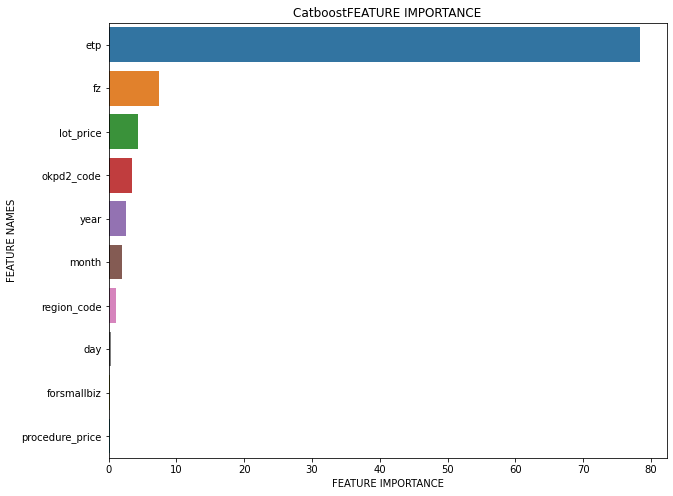

In [57]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance: np.array(int), names: List[str], model_type: str):
    """
    importance -> numeric value of features
    names -> features name
    model_type -> model name
    
    draw importance of features
    """
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(catboost.feature_importances_, X_train.columns, 'Catboost')

`etp, fz, lot_price` показали наибольшую важность среди остальных признаков

# Работа с текстовым описанием
1. Предобработаю текст путём лемматизации и маленькой очистки текста с добавлением ключевого слова `__label__` между колонками описания
2. Запишу предобработанный текст в txt файл для наиболее удобного использования
3. Затем построю эмбеддинги с помощью *FastText* на основе сформированного текста
4. Модель *FastText* взята с https://rusvectores.org/ru/models/ (**geowac_lemmas_none_fasttextskipgram_300_5_2020**) 

## Предобработка текста

In [ ]:
pip install pymorphy2[fast]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 8.2 MB 6.0 MB/s 
     |████████████████████████████████| 371 kB 53.5 MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=860702 sha256=9621e0325b209599d5988d2cf5a3e96058e8d609668586e07531397f583a5be8
  Stored in directory: /root/.cache/pip/wheels/85/51/a4/2de41ff197786537075027c27b479a38da92f50abc86634445
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=dc32d54bc7a90f690ce77f87affcb02beffa528d22f4fc3b96c5eba90d0f276f
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built DAWG docopt


In [49]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [50]:
def procces_words(request: List[str]) -> str:
    """
    return prepared data (add lemmatization, delete double, add __lable__ behind sentecses)
    
    request -> list of senteces by cols2embedding columns one row
    """  
    request = ' __label__ '.join([word for word in set(request) if word is not np.NaN])
    request = morph.parse(request)[0].normal_form
    return request

def formate_text_row(data: pd.DataFrame, cols2embedding: List[str], file_name: str):
    """
    write lemmatize text to txt file
    
    data -> dataframe which we want to preprocess
    cols2embedding -> columns for creating embeddings
    file_name -> name of saving file
    """
    row_list = np.array([])
    with open(file_name, 'w', encoding='utf-8') as f:
        for idx in tqdm(data_train.index):
            lem_row = procces_words(data.loc[idx, cols2embedding].values) + '\n'
            f.write(lem_row)

In [51]:
data_train, data_test = data.iloc[:int(size*share)], data.iloc[-int(size*(1-share)):]

In [55]:
file_name = 'lem_text_train.txt'
formate_text_row(data_train, cols2embedding, file_name)

## Формирование эмбеддинга

Скачиваю FastText модель **geowac_lemmas_none_fasttextskipgram_300_5_2020** с https://rusvectores.org/ru/models/

In [ ]:
!wget http://vectors.nlpl.eu/repository/20/213.zip

--2022-11-11 08:19:00--  http://vectors.nlpl.eu/repository/20/213.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1485270300 (1.4G) [application/zip]
Saving to: ‘213.zip’

213.zip             100%[===================>]   1.38G  10.3MB/s    in 2m 29s  

2022-11-11 08:21:31 (9.48 MB/s) - ‘213.zip’ saved [1485270300/1485270300]



In [ ]:
!unzip /content/213.zip

Archive:  /content/213.zip
  inflating: meta.json               
  inflating: model.model             
  inflating: model.model.vectors_ngrams.npy  
  inflating: model.model.vectors.npy  
  inflating: model.model.vectors_vocab.npy  
  inflating: README                  


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import gensim

model = gensim.models.KeyedVectors.load('model.model')

In [57]:
def get_request_vector(request: List[str], model) -> List[List[str]]:
    """
    return vector of request

    request -> list of senteces by cols2embedding columns one row
    model -> fasttext model
    """
    vec = np.zeros(model.vector_size)
    #request = procces_words(request)
    # iterate on every word
    for word in request.split():
        
      # build embedding 
      embed = model[word]
      # normalize
      embed_norm = embed / np.linalg.norm(embed)
      # sum embeddings for average
      vec += embed_norm

    # average embeddings
    vec /= len(request)
    v = np.float32(np.array([vec]))
    v /= np.linalg.norm(v)
    return v

In [58]:
def get_text(path: str) -> List[str]:
    """
    Return text from file
    
    path -> path to save file
    """
    corpus = []
    with open(path, 'r', encoding='utf-8') as f:
        corpus = [line for line in tqdm(f)]
    return corpus

def get_embedding(path: str):
    """
    Return embedding from text file
    
    path -> path to save file
    """
    crp = get_text(path)
    embeddings = np.array([get_request_vector(line[:-1], model)[0] for line in tqdm(crp)])
    return embeddings

In [59]:
# Формирование эмбеддинга
emb = get_embedding(file_name)

In [60]:
# Сохранение эмбеддинга
np.save('embedding_train.npy', emb)

# Рекомендация ИНН
1. С помощью косинусной близости находим $\sqrt{N}$ похожих элементов, где N - размер тренировочного датасета 
2. Найдя похожие элементы, с помощью catboost предскажим какие ИНН могут купить данный товар
3. Вывод ИНН

In [61]:
emb = np.load("embedding_train.npy")

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
def find_similarity(data: pd.DataFrame, discription: List[str]) -> pd.DataFrame:
    """
    return 
    
    data -> initial data, which use for create embedding
    discription -> text discription of product
    """
    vector = get_request_vector(procces_words(discription), model)
    similarity_matrix = cosine_similarity(vector, emb)
    return data.iloc[similarity_matrix.argsort()[0][::-1]].iloc[:int(data.shape[0]**0.5)]

In [64]:
def predict(input_data: pd.DataFrame , cols2embedding: List[str], cols2model: List[str]) -> np.array(str):
    """
    return suitable inn depends on pn_lot
    
    input_data -> text discription and features of pn_lot
    cols2embedding -> columns for creating embeddings
    cols2model -> columns for prediction model
    """
    discription = input_data[cols2embedding].values
    data_similarity = find_similarity(data_train, discription[0])
    predict_wins = catboost.predict(data_similarity[cols2model])
    return data_similarity.loc[predict_wins.astype(bool)]['participant_inn_kpp'].values

In [65]:
cols2embedding
cols2model = ['region_code', 'etp', 'forsmallbiz', 'lot_price', 'procedure_price', 'okpd2_code', 'fz', 'year', 'month', 'day']

In [66]:
input_data = data_test.loc[[1667151]].drop(['is_winner'], axis=1)
input_data

,pn_lot,region_code,etp,purchase_name,lot_name,forsmallbiz,lot_price,procedure_price,okpd2_code,item_descriptions,participant_inn_kpp,fz,year,month,day
1667151,0891200000621007861_,75,fabrikant.ru,Поставка бумажных полотенец (8051-ЭА),NaN,False,104330.0,0.0,17.2,Полотенце бумажное,9144d3a8eb98ce099f9412f54bff697553be5d1dc5fbfa...,44fz,2021,7,29


In [67]:
inn = data[data['pn_lot'] == '2570200313921000417']['participant_inn_kpp'].values[0]
data[data['pn_lot'] == '2570200313921000417']

IndexError: index 0 is out of bounds for axis 0 with size 0

In [68]:
inns = predict(input_data, cols2embedding, cols2model)
inns

array(['215d6ead2c085ffa7c3e9581bf17dbb5b74637b163c4530ac771d4fc7c81c5cc',
       '72591bc934e1d64e689deb1d381613577c20272935a8ac79ca71ac039b0b301b',
       'f3ce04bb4d308c6a3a09e507e7daf92c75d92de05c28bd95965aa7178a2c0343',
       '0a35d5d9e8fad5520b16c2c2b876d9b5bd06a24fa2c7e9355158b4b9f9fb6c06',
       '1784e08d31cb9a5c65afca7028d22ed9e2200b7bb4751a7877c558c81f9b0a3c',
       '76c9bb9a8e90cb5aa31a1aab1dd47d7f042ba06a5e39cc56a18a25e50c121a76',
       '1ca30f0ee50a654ba78857b4b73ca0bc4573560c8cc937fa8631967b5b92c488',
       'c2d341b8464b1d7d436d89060eba242f6e493a8140d708eae86df76d8750df98',
       'ab1534cb4b30742181870622c0c5c063a75fc3c94bebf3ea340569def5c853df',
       '635626627055979deec18909d8779c54eaa4e4756b72bc1f95e4cf1bd0399431',
       '47b1ea27e3d9361f6a1657d7783049d051b18aad7739c436f7e4ceaf5467352b',
       '9240d35b1d021871298ecf2daccba266afe5a57e0e24a6177bd1f57694766c2d',
       '10ca5d47ec4775d799c031af708cf1b25fdc61718dd8544041a52d84121cf388',
       'b8b7189ba2624bf80

## Подсчёт метрик
1. Метрика №1 - Для какой части процедур в зависимости от n угадали хотя бы одного участника
2. Метрика №2 - Общая доля угаданных уникальных участий

In [69]:
# Взяв pn_lot из data_test, может оказаться так, что данного pn_lot`a может не быть в data_train
# Это означает, что я не смогу посмотреть участников данного pn_lot`a
# Следственно пустые DataFrame буду пропускать

def get_first_metric(data_test, n):
    count_full_df = 0
    s = 0
    for i in range(data_test.shape[0]):
        input_data = data_test.iloc[[i]].drop(['is_winner'], axis=1)
        pn_lot = input_data['pn_lot'].values[0]
        df = data_train[data_train['pn_lot'] == pn_lot]
        if not(df.empty):
            predicted_inns = set(predict(input_data, cols2embedding, cols2model)[:n])
            compared_inns = set(df['participant_inn_kpp'].values)
            s += bool(predicted_inns.intersection(compared_inns))
            count_full_df += 1
    s /= count_full_df
    return s

In [95]:
def get_second_metric(data_test, n):
    count_full_df = 0
    s = 0
    for i in range(data_test.shape[0]):
        # Формируем датасет
        input_data = data_test.iloc[[i]].drop(['is_winner'], axis=1)
        # Достаём pn_lot
        pn_lot = input_data['pn_lot'].values[0]
        # в базе ИННов (в трейне в данном случае) нахожу необходимый pn_lot для сравнения 
        df = data_train[data_train['pn_lot'] == pn_lot]
        if not(df.empty):
            # Предсказываю ИННы
            predicted_inns = set(predict(input_data, cols2embedding, cols2model)[:n])
            # ИННы в базе данных (в трейне)
            compared_inns = set(df['participant_inn_kpp'].values)
            # Суммирую количество нахождений
            s += len(predicted_inns.intersection(compared_inns))
            count_full_df += df.shape[0]
    s /= count_full_df
    return s

In [97]:
small_data_test = data_test.iloc[:500]
n_array = np.arange(1, 500, 30)
m_1 = []
m_2 = []

In [98]:
for n in tqdm(n_array):         
    m_1.append(get_first_metric(small_data_test, n))
    m_2.append(get_second_metric(small_data_test, n))

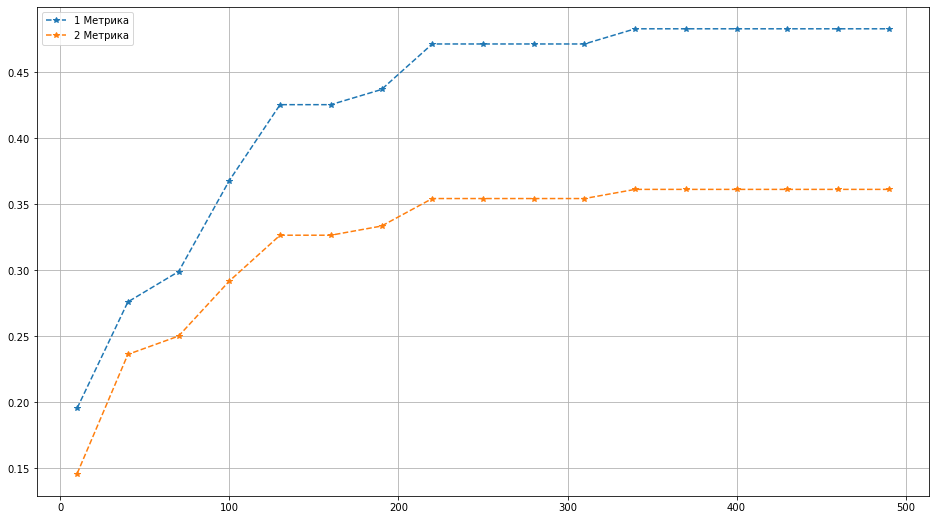

In [99]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(n_array, m_1, linestyle = 'dashed', marker="*", label=f"1 Метрика")
plt.plot(n_array, m_2, linestyle = 'dashed', marker="*", label=f"2 Метрика")
plt.grid()
plt.legend()
plt.show()

In [107]:
small_data_test = data_test.iloc[:1000]
n_array = np.arange(1, 11)
m_small_1 = []
m_small_2 = []

In [109]:
for n in tqdm(n_array):         
    m_small_1.append(get_first_metric(small_data_test, n))
    m_small_2.append(get_second_metric(small_data_test, n))

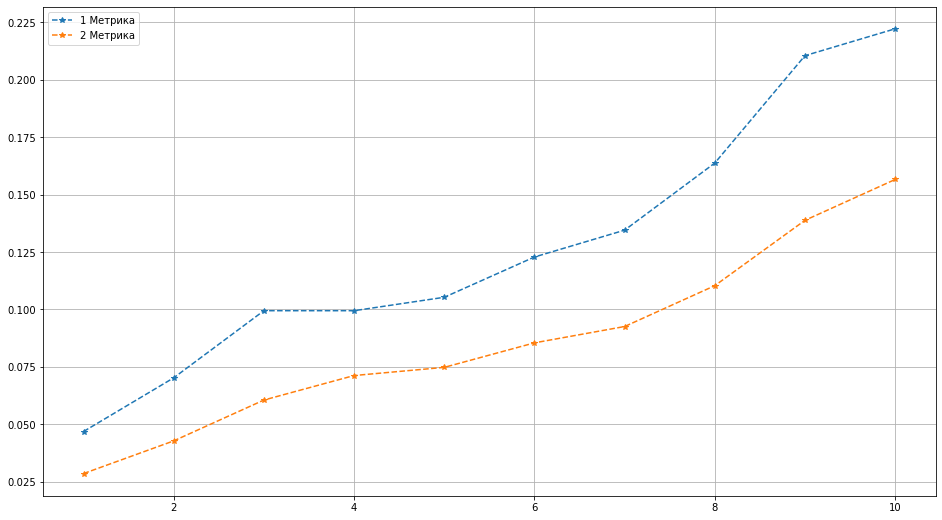

In [110]:
plt.plot(n_array, m_small_1, linestyle = 'dashed', marker="*", label=f"1 Метрика")
plt.plot(n_array, m_small_2, linestyle = 'dashed', marker="*", label=f"2 Метрика")
plt.grid()
plt.legend()
plt.show()